In [ ]:





##################################### THE CRIME SIDE OF THINGS ###############################################














In [382]:
#data Explorer API info

#api key for Crime Data Explorer is: 3vyNxjUufgFD2Fzgk2EibgH1571C1uOlcPPqGJRc

#URL: https://api.usa.gov/crime/fbi/cde

import requests

# FBI Crime Data Explorer
Key = "3vyNxjUufgFD2Fzgk2EibgH1571C1uOlcPPqGJRc"
# root url
rootURL = "https://api.usa.gov/crime/fbi/cde"


In [383]:
#ori list for each department in ether county

#BoulderDeptList = (CO0070000,CO0070100,CO0070300,CO0070400,CO0070500,CO0070600,CO0070800)
#ArapahoeDeptList = (CO0030000,CO0030100,CO0030200,CO0030300,CO0030400,CO0030500,CO0030600,CO0030700,CO0030800,CO0030900,CO0031100)

In [384]:
TestQuery = requests.get(rootURL+"/agency/byStateAbbr/CO?API_KEY="+Key).json()

In [385]:
TestQuery

[{'ori': 'CO0010000',
  'agency_name': "Adams County Sheriff's Office",
  'state_name': 'Colorado',
  'state_abbr': 'CO',
  'division_name': 'Mountain',
  'region_name': 'West',
  'region_desc': 'Region IV',
  'county_name': 'ADAMS',
  'agency_type_name': 'County',
  'nibrs': True,
  'nibrs_start_date': '1997-01-01T00:00:00.000Z',
  'latitude': '39.874325',
  'longitude': '-104.331872'},
 {'ori': 'CO0010100',
  'agency_name': 'Aurora Police Department',
  'state_name': 'Colorado',
  'state_abbr': 'CO',
  'division_name': 'Mountain',
  'region_name': 'West',
  'region_desc': 'Region IV',
  'county_name': 'ADAMS, ARAPAHOE, DOUGLAS',
  'agency_type_name': 'City',
  'nibrs': True,
  'nibrs_start_date': '1985-01-01T00:00:00.000Z',
  'latitude': '39.70955',
  'longitude': '-104.81493'},
 {'ori': 'CO0010200',
  'agency_name': 'Brighton Police Department',
  'state_name': 'Colorado',
  'state_abbr': 'CO',
  'division_name': 'Mountain',
  'region_name': 'West',
  'region_desc': 'Region IV',
  '

In [386]:
#parse through the list of all law enforsment agencys and add the values that
#mach with the keys BOULDER or ARAPAHOE and apply the ori to there lists 
BoulderORIList=[]
ArapahoeORIList=[]

print ("Boulder ORI list") 
for a in TestQuery:
    if a['county_name'] == ("BOULDER"):
        BoulderORIList.append(a["ori"])
print(BoulderORIList)
print("")
print("")
print ("Arapahoe ORI list") 
for b in TestQuery:
    if b['county_name'] == ("ARAPAHOE"):
        ArapahoeORIList.append(b["ori"])
print(ArapahoeORIList)

#TestQuery

Boulder ORI list
['CO0070000', 'CO0070100', 'CO0070300', 'CO0070500', 'CO0070600', 'CO0070800']


Arapahoe ORI list
['CO0030000', 'CO0030100', 'CO0030300', 'CO0030400', 'CO0030500', 'CO0030700', 'CO0030800', 'CO0030900', 'CO0031100']


In [388]:
# im using the Crime data Explorer to retrive the 
#nesesary request ---> URL: https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/docApi
NewRootURL = "https://api.usa.gov/crime/fbi/cde/arrest/agency/"

In [389]:
#CO0030000 in the url is a police station in arapahoe county 
# just to look at the output and see if we can pull any important information
CrimeQuery = requests.get(NewRootURL+"CO0030000/all?from=2019&to=2019&API_KEY="+Key).json()

In [390]:
CrimeQuery

{'title': 'All Arrest by Offense',
 'keys': ['Aggravated Assault',
  'All Other Offenses (Except Traffic)',
  'Arson',
  'Burglary',
  'Curfew and Loitering Law Violations',
  'Disorderly Conduct',
  'Driving Under the Influence',
  'Drug Abuse Violations - Grand Total',
  'Drunkenness',
  'Embezzlement',
  'Forgery and Counterfeiting',
  'Fraud',
  'Gambling - Total',
  'Human Trafficking - Commercial Sex Acts',
  'Human Trafficking - Involuntary Servitude',
  'Larceny - Theft',
  'Liquor Laws',
  'Manslaughter by Negligence',
  'Motor Vehicle Theft',
  'Murder and Nonnegligent Manslaughter',
  'Offenses Against the Family and Children',
  'Prostitution and Commercialized Vice',
  'Rape',
  'Robbery',
  'Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)',
  'Simple Assault',
  'Stolen Property: Buying, Receiving, Possessing',
  'Suspicion',
  'Vagrancy',
  'Vandalism',
  'Weapons: Carrying, Possessing, Etc.'],
 'data': [{'data_year': 2019,
   'Aggravated Assault': 5

In [ ]:
#because it dosnt have a total i gues i have to make a function to 
# function to add up all of the arests per law enforsment agency

In [391]:
BoulderORIList[1]

'CO0070100'

In [406]:
def CrimeCounter1(department):
    CrimeCount = (0)
    for thing in department['data']:
        for crime in thing:
            if crime != 'data_year':
                CrimeCount += thing[crime]
            print(CrimeCount)

In [407]:
#test to see if it works and is counting corectly 
CrimeCounter1(CrimeQuery)
#IT WORKS

0
51
394
395
403
403
426
534
582
582
582
586
599
599
599
599
626
637
637
643
643
672
675
675
677
846
850
850
850
890
899
901


In [410]:
#going through all of the key value pares and adding them to a counter to get the total number 
# number of crimes per agency in each county. 
def CrimeCounter2(department):
    CrimeCount = (0)
    for thing in department['data']:
        for crime in thing:
            if crime != 'data_year':
                CrimeCount += thing[crime]
    return CrimeCount
            

In [411]:
#results on this one department in the year 2019
CrimeCounter2(CrimeQuery)

901

In [473]:
def BoulderCrimeCount():
    #total for all of Boulder County
    
    BTotalCrime = 0
    #we have to make a loop to itorate through the BoulderORIList and plug each ORI into the API request 
    # we have to change the crime query to somthing new (with the ori variable because you cant use the quuery with
    #a non existing variable so it hasd to be inside the loop with ori being stated beforehand)
    for ori in BoulderORIList:
        NewQuery = requests.get(NewRootURL+ori+"/all?from=2019&to=2019&API_KEY="+Key).json()
        Count = CrimeCounter2(NewQuery)
        BTotalCrime += Count
    return BTotalCrime

In [474]:
BoulderCrimeCount()

9835

In [485]:
def ArapahoeCrimeCount():
    #total for all of Arapahoe county 
    
    ATotalCrime = 0

    for ori in ArapahoeORIList:
        NewerQuery = requests.get(NewRootURL+ori+"/all?from=2019&to=2019&API_KEY="+Key).json()
        Count = CrimeCounter2(NewerQuery)
        ATotalCrime += Count
    return ATotalCrime

In [492]:
#THIS IS IT!!!!!!!!!! 
#all that work for this... was there an easyer way to do this?...probably. 

print("total arests for all Boulder county in 2019: "+str(BoulderCrimeCount()))
print("total arests for all Arapahoe county in 2019: "+str(ArapahoeCrimeCount()))

total arests for all Boulder county in 2019: 9835
total arests for all Arapahoe county in 2019: 7129


In [500]:
#population of boulder 2019 = 326,020
#population of Arapahoe county 2019 = 656,051
BoulderPop = 326020
ArapahoePop = 656051
#Sources include: United States Census Bureau
#Quick math:
BArestsPerThou = (BoulderCrimeCount() * 1000)//BoulderPop
AArestsPerThou = (ArapahoeCrimeCount() * 1000)//ArapahoePop
print("Boulder county arests per 1000 resadance: "+str(BArestsPerThou))
print("Arapahoe county arests per 1000 resadance: "+str(AArestsPerThou))

Boulder county arests per 1000 resadance: 30
Arapahoe county arests per 1000 resadance: 10


In [493]:
##refrance
#totalListeners = 0
#for artistMatch in radioQuery["results"]["artistmatches"]["artist"]:
    ##each thing in the list is a dictionary which is being stored in the variable artistMatch
    ##print the name of each artist
    #print(artistMatch["name"])
    ## print number of listeners for each artist
    #print(artistMatch["listeners"])
    #totalListeners += int(artistMatch["listeners"])
#print("Total Listeners: "+str(totalListeners))

In [ ]:












############################### $ NOW FOR THE MONEY SIDE OF THINGS $ ####################################












In [708]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#data sourse is from the United states census bureau

# Load the Boulder County, Colorado income data into a data frame
BoulderIncomeDF = pd.read_csv("Income-Boulder-Colorado-2019")

# Load the Arapahoe County, Colorado income data into a data frame
ArapahoeIncomeDF = pd.read_csv("income-Arapahoe-Colorado-2019")


In [697]:
# refrance
# we can add columns to a dataframe similar to how we do it with a dictionary
#gamelogsDF["seasonYear"] = 2022

In [699]:
BoulderIncomeDF


,Label (Grouping),"Boulder County, Colorado Households Estimate","Boulder County, Colorado Families Estimate","Boulder County, Colorado Married-couple families Estimate","Boulder County, Colorado Nonfamily households Estimate"
0,Total,"131,854","74,958","60,790","56,896"
1,"Less than $10,000",5.8%,2.5%,0.9%,11.0%
2,"$10,000 to $14,999",2.6%,0.8%,0.2%,4.9%
3,"$15,000 to $24,999",5.8%,2.9%,1.7%,9.6%
4,"$25,000 to $34,999",5.0%,3.0%,2.3%,7.8%
5,"$35,000 to $49,999",9.0%,6.2%,4.8%,13.1%
6,"$50,000 to $74,999",14.7%,14.8%,14.0%,14.2%
7,"$75,000 to $99,999",13.7%,13.7%,14.0%,13.2%
8,"$100,000 to $149,999",17.0%,21.4%,23.2%,12.0%
9,"$150,000 to $199,999",10.5%,12.8%,14.2%,7.3%


In [700]:
ArapahoeIncomeDF

,Label (Grouping),"Arapahoe County, Colorado Households Estimate","Arapahoe County, Colorado Families Estimate","Arapahoe County, Colorado Married-couple families Estimate","Arapahoe County, Colorado Nonfamily households Estimate"
0,Total,"246,302","160,274","121,578","86,028"
1,"Less than $10,000",3.8%,1.8%,1.0%,7.7%
2,"$10,000 to $14,999",1.9%,0.8%,0.3%,3.9%
3,"$15,000 to $24,999",4.2%,2.4%,1.1%,8.3%
4,"$25,000 to $34,999",5.7%,4.2%,3.1%,9.0%
5,"$35,000 to $49,999",11.2%,8.4%,5.8%,17.1%
6,"$50,000 to $74,999",19.0%,17.4%,14.9%,23.1%
7,"$75,000 to $99,999",13.5%,13.8%,13.9%,11.8%
8,"$100,000 to $149,999",19.3%,23.1%,25.4%,11.7%
9,"$150,000 to $199,999",10.2%,13.3%,16.1%,3.5%


In [701]:
biDF = BoulderIncomeDF[["Label (Grouping)","Boulder County, Colorado Households Estimate"]]


In [702]:
aiDF = ArapahoeIncomeDF[["Label (Grouping)","Arapahoe County, Colorado Households Estimate"]]

In [703]:
# lets get the household incomes in one DF 

In [840]:
# df.set_index('key').join(other.set_index('key'))
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
#other is the only required parameter. It defines the other DataFrame to join.
#You can also specify a list of DataFrames here, allowing you to combine 
#a number of datasets in a single .join() call.
#df.join(other.set_index('key'), on='key')
mmDF = biDF.join(aiDF.set_index("Label (Grouping)"), on = "Label (Grouping)")
#battingDF.sort_values("HR")
mmDF

,Label (Grouping),"Boulder County, Colorado Households Estimate","Arapahoe County, Colorado Households Estimate"
0,Total,"131,854","246,302"
1,"Less than $10,000",5.8%,3.8%
2,"$10,000 to $14,999",2.6%,1.9%
3,"$15,000 to $24,999",5.8%,4.2%
4,"$25,000 to $34,999",5.0%,5.7%
5,"$35,000 to $49,999",9.0%,11.2%
6,"$50,000 to $74,999",14.7%,19.0%
7,"$75,000 to $99,999",13.7%,13.5%
8,"$100,000 to $149,999",17.0%,19.3%
9,"$150,000 to $199,999",10.5%,10.2%


In [842]:
boo =mmDF.iloc[1:11]

boo

,Label (Grouping),"Boulder County, Colorado Households Estimate","Arapahoe County, Colorado Households Estimate"
1,"Less than $10,000",5.8%,3.8%
2,"$10,000 to $14,999",2.6%,1.9%
3,"$15,000 to $24,999",5.8%,4.2%
4,"$25,000 to $34,999",5.0%,5.7%
5,"$35,000 to $49,999",9.0%,11.2%
6,"$50,000 to $74,999",14.7%,19.0%
7,"$75,000 to $99,999",13.7%,13.5%
8,"$100,000 to $149,999",17.0%,19.3%
9,"$150,000 to $199,999",10.5%,10.2%
10,"$200,000 or more",15.9%,11.2%


In [687]:
#lets chart this to get a better understanding of the income ranges in each county 


In [ ]:
#NOTE: i cant seem to get these charts just right, i cought the y axis problem a day before its due(i know i messed up)

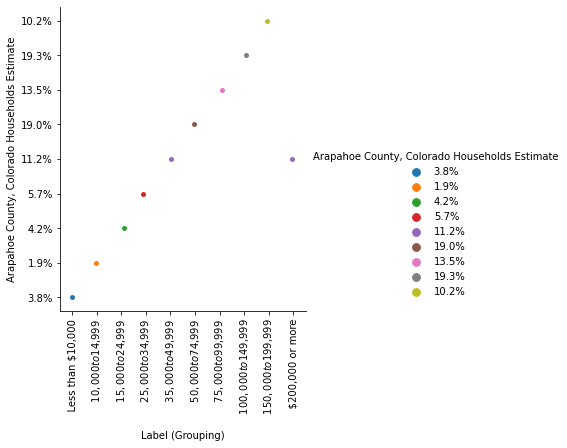

In [1078]:

sb.catplot(x="Label (Grouping)",y="Arapahoe County, Colorado Households Estimate",data=boo,hue="Arapahoe County, Colorado Households Estimate").set_xticklabels(rotation=90)


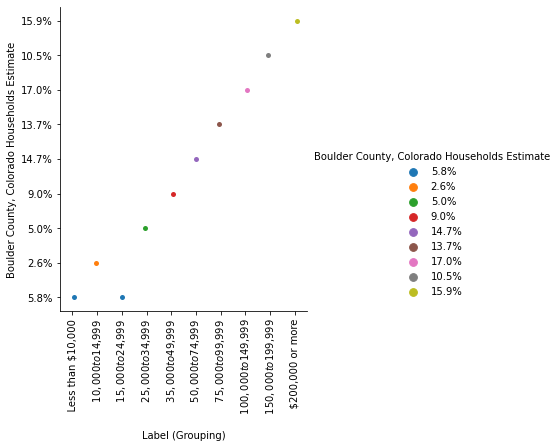

In [1073]:
sb.catplot(x="Label (Grouping)",y="Boulder County, Colorado Households Estimate",hue="Boulder County, Colorado Households Estimate",data=boo).set_xticklabels(rotation=90)

In [ ]:
#i will try to fix it


# im trying to re structure the Dataframes inorder to get seaborn to play nice

In [1067]:
TransArapahoeIncomeDF = pd.read_csv("Arapahoe-income-transposed",header=None).iloc[3:4, 2:12]
#weekdayLeagueDF.columns = ["Day of Week","League","Total Games"]

TransArapahoeIncomeDF.columns = ["Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"]

Alump = TransArapahoeIncomeDF
Alump

,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"
3,3.8%,1.9%,4.2%,5.7%,11.2%,19.0%,13.5%,19.3%,10.2%,11.2%


In [1041]:
TransBoulderIncomeDF = pd.read_csv("Boulder-income-transposed",header=None).iloc[3:4, 2:12]
#weekdayLeagueDF.columns = ["Day of Week","League","Total Games"]
TransBoulderIncomeDF.columns = ["Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"]

Blump = TransBoulderIncomeDF
Blump

#battingDF.loc[[90000,92000,100000],["playerID","teamID","yearID","HR"]]

,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"
3,5.8%,2.6%,5.8%,5.0%,9.0%,14.7%,13.7%,17.0%,10.5%,15.9%


In [1042]:
Blump = Blump.append(Alump)

In [1045]:
#sb.catplot(x=Blump[::],y="HR",data=Blump,hue="playerID",kind="bar",height=5).set_xticklabels(rotation=90)
#lambda time
Blump = Blump.apply(lambda x: x.str.replace('%', ''))
Blump = Blump.reset_index()


In [1046]:
Blump

,index,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"
0,3,5.8,2.6,5.8,5.0,9.0,14.7,13.7,17.0,10.5,15.9
1,3,3.8,1.9,4.2,5.7,11.2,19.0,13.5,19.3,10.2,11.2


In [ ]:
#i couldnt seem to get seaborn to accept my DataStructure, but this is the next best thing ^^^

In [760]:












###################################### lets look at some cop stuff ##############################











In [771]:
CoCops = pd.read_csv("colorado-police.csv")

In [772]:
CoCops

,County,Total law enforcement employees,Total officers,Total civilians,Unnamed: 4
0,Adams,583.0,400.0,183.0,NaN
1,Arapahoe,568.0,243.0,325.0,NaN
2,Boulder,396.0,108.0,288.0,NaN
3,Clear Creek,67.0,25.0,42.0,NaN
4,Douglas,522.0,351.0,171.0,NaN
...,...,...,...,...,...
59,Yuma,21.0,7.0,14.0,NaN
60,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN


In [893]:
CoCops = CoCops.drop(columns=["Unnamed: 4"])
        

In [894]:
boop = CoCops.query("County == 'Arapahoe' or County == 'Boulder'")
boop

,County,Total law enforcement employees,Total officers,Total civilians
1,Arapahoe,568.0,243.0,325.0
2,Boulder,396.0,108.0,288.0


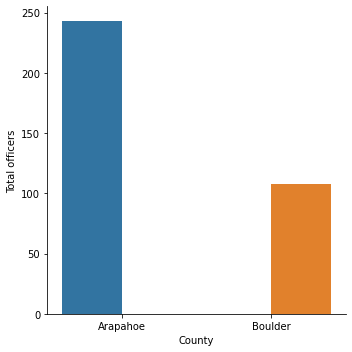

In [1079]:
sb.catplot(x="County",y="Total officers",data=boop,hue="County",kind="bar")

In [1081]:
# quick math 
BoulderPop = 326020
ArapahoePop = 656051

BCopPerThou = (108*1000)/BoulderPop
ACopPerThou = (243*1000)/ArapahoePop

print(BCopPerThou)
print(ACopPerThou)

0.33126802036684866
0.37039803307974534
